In [1]:
# Install libs needed
!pip3 install torch 
!pip3 install torchvision
!pip3 install torchtext
!pip3 install pandas
!pip3 install nltk
!pip3 install -U scikit-learn scipy matplotlib
!pip3 install spacy
!pip3 install seaborn
!pip3 install keras_preprocessing
!pip3 install textaugment
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
Looking in indexes: https://p

In [2]:
# Import libs
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import re
# from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
import seaborn as sns
from collections import Counter
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [3]:
# Download the stopwords from nltk 
nltk.download('stopwords')
ntst = stopwords.words('english')
print(ntst)
print(len(ntst))

# Download the stopwords from spacy
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)
print(len(STOP_WORDS))

# Merge the two stopwords above to one set
stwords = set(ntst).union(STOP_WORDS)
print(stwords)
print(len(stwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
##### Preprocessing the data when reading the data from csv file #####
# Delete the stopwords
def delete_stopwords(text):
  text = str(text)
  tx_arr = text.split()
  [w for w in tx_arr if w not in stwords]
  return ' '.join( [w for w in tx_arr if w not in stwords])

def clean_str(string):
    string = str(string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

# Replace the empty text with np.NaN so that we can apply 'dropna' to the all the rows
def replace_empltytext(text):
  text = str(text)
  if text.isspace() or len(text) <= 0:
    text = np.NaN
  return text

# Load the csv file and do all the preprocessing mentioned above
def load_csv(file_path):
  df = pd.read_csv(file_path)
  df.columns = ["id","title","text","label"]
  df.drop(labels=['id','title'], axis='columns', inplace=True)
  df['text'] = df['text'].apply(clean_str)
  df['text'] = df['text'].apply(delete_stopwords)  
  df['text'] = df['text'].apply(replace_empltytext)
  df.dropna(inplace=True)
  return df

In [5]:
# Only if you are using Google Colab, you need to mount the Google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
# Make a finder named NLP and change the root path to this finder
import os
os.chdir("/content/gdrive/My Drive/NLP/")

In [7]:
# Use the function defined above to load the csv data
# df = load_csv('WELFake_Dataset.csv')
df = load_csv('WELFake_Dataset.csv')

In [8]:
# Print the data summary 
df.info()

# Print some rows of the dataset
print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71388 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    71388 non-null  object
 1   label   71388 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB
                                                    text  label
0      comment expected barack obama members fyf911 f...      1
1                                  post votes hillary \?      1
2      , demonstrators gathered night exercising cons...      1
3      dozen politically active pastors came private ...      0
4      rs 28 sarmat missile , dubbed satan 2 , replac...      1
...                                                  ...    ...
72129  washington \( reuters \) hackers believed work...      0
72130  know , fantasyland republicans questioned citi...      1
72131  migrants refuse leave train refugee camp hunga...      0
72132  mexico city \( reuters \) donald trump combati...  

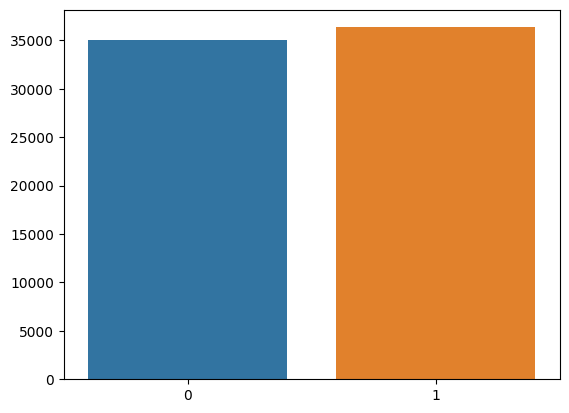

In [9]:
# Check if the data is balanced between all the classes
data_count = df['label'].value_counts()
sns.barplot(x=np.array([1,0]),y=data_count.values)
plt.show()

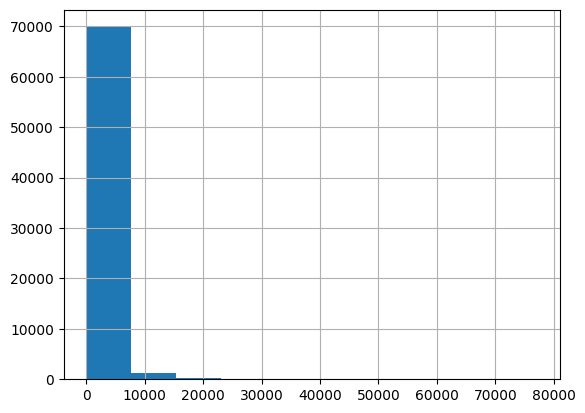

count    71388.000000
mean      2212.280944
std       2415.306556
min          1.000000
25%        952.000000
50%       1649.000000
75%       2764.000000
max      77126.000000
dtype: float64

In [10]:
# Plot the length distribution of sentences of the dataset
rev_len = [len(i) for i in  df['text']]
pd.Series(rev_len).hist()
plt.show()

# Summarize the sentence length distribution
pd.Series(rev_len).describe()

In [11]:
# Calculate the number of rows with lable 1 and 0
df_zero, df_one= df[df['label'] == 0], df[df['label'] ==1]

print('length of sentences with label zero : %4d' % (len(df_zero)))
print('length of sentences with label one: %4d' % (len(df_one)))


length of sentences with label zero : 35026
length of sentences with label one: 36362


In [12]:
# Calculate 70% of the number of class 0 and class 1
# Then take the smaller one 
train_length = int(min(len(df_zero) * 0.7, len(df_one) * 0.7))
print('length of each train set: %4d ' % (train_length))

train_zero = df_zero.sample(n = train_length, random_state=42)
test_zero = df_zero.drop(train_zero.index)

train_one = df_one.sample(n = train_length , random_state=42)
test_one = df_one.drop(train_one.index)

# Training dataset
train_data = pd.concat([train_zero, train_one])
# Test dataset
test_data = pd.concat([test_zero, test_one])

print(len(train_data))
print(len(test_data))


length of each train set: 24518 
49036
22352


In [13]:
test_data

,text,label
11,brussels \( reuters \) british prime minister ...,0
12,"washington \( reuters \) charles schumer , dem...",0
28,washington republican senators monday proposed...,0
44,london \( reuters \) u president elect donald ...,0
46,"seven fishermen aboard carolina queen iii , sc...",0
...,...,...
72105,flip flop vox warns risk election day violence...,1
72110,sacrifice peasants hollywood actor leonardo di...,1
72113,waking times alex pietrowski important ecologi...,1
72114,hillary clinton claim beat president trump 201...,1


In [14]:
# Tokenizer from a pretrained model
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
from textaugment import EDA
t = EDA()

# Create a new dataframe for augmented data
augmented_df = pd.DataFrame(columns=['text', 'label'])

# Apply augmentation
# for index, row in tqdm(train_data.iterrows()):
#   augmented_df.loc[len(augmented_df)] = {'text': t.synonym_replacement( row['text']), 'label': row['label']}

# train_data = pd.concat([train_data, augmented_df]) 


In [16]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
test_data

In [18]:

def tokenize_dataset(dataframe):
  X = []
  for index, row in tqdm(dataframe.iterrows()):
    token = tokenizer(row['text'], 
                      add_special_tokens = False, 
                      max_length=512, truncation=True, 
                      padding="max_length")["input_ids"]
    
    X.append(token)
  return X

train_data['token'] = tokenize_dataset(train_data)

49036it [07:28, 109.45it/s]


In [ ]:
train_data.info

In [20]:
test_data['token'] = tokenize_dataset(test_data)

22352it [03:22, 110.51it/s]


In [21]:
test_data.info

<bound method DataFrame.info of                                                     text  label  \
0      brussels \( reuters \) british prime minister ...      0   
1      washington \( reuters \) charles schumer , dem...      0   
2      washington republican senators monday proposed...      0   
3      london \( reuters \) u president elect donald ...      0   
4      seven fishermen aboard carolina queen iii , sc...      0   
...                                                  ...    ...   
22347  flip flop vox warns risk election day violence...      1   
22348  sacrifice peasants hollywood actor leonardo di...      1   
22349  waking times alex pietrowski important ecologi...      1   
22350  hillary clinton claim beat president trump 201...      1   
22351  judge jeanine lets rip ! concerned silencing c...      1   

                                                   token  
0      [9371, 1032, 1006, 26665, 1032, 1007, 2329, 35...  
1      [2899, 1032, 1006, 26665, 1032, 1007, 

In [22]:
train_tensor_dataset = TensorDataset(torch.tensor(train_data['token'].values.tolist()), torch.tensor(train_data['label'].values.tolist()))
test_tensor_dataset = TensorDataset(torch.tensor(test_data['token'].values.tolist()), torch.tensor(test_data['label'].values.tolist()))

In [23]:
# dataloaders 
batch_size = 104

# make sure to SHUFFLE your data
train_loader = DataLoader(train_tensor_dataset, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_tensor_dataset, shuffle=False, batch_size=44)

In [24]:
torch.device("cpu")
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if torch.cuda.is_available:
    device = torch.device("cuda")
    print("GPU is available")
else:
    print("GPU is not available, CPU used")

GPU is available


In [25]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers, bidirectional = False, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.sig = nn.Sigmoid()

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.num_layers,batch_size,self.hidden_size)).to(device)
        c0 = torch.zeros((self.num_layers,batch_size,self.hidden_size)).to(device)
        return (h0,c0)
        
    def forward(self, x, hidden):
      
        batch_size = x.size(0)

        embedded = self.embedding(x)

        out, hidden = self.lstm(embedded, hidden)
        
        # Extract the last timestep's output
        out = out[:, -1, :]

        out = self.dropout(out)

        out = self.fc(out)

        out = self.sig(out)

         # Reshape to be batch_size first
        out = out.view(batch_size, -1)

        out = out[:, -1] # get last batch of labels
      
        return out, hidden


In [26]:
# Define the model
embedding_dim = 100
num_classes = 1
vocab_size = 30522
hidden_size = 32
num_layers = 5

# Create the model
model = LSTMClassifier(vocab_size, embedding_dim, hidden_size, num_layers, num_classes)
model.to(device)

LSTMClassifier(
  (embedding): Embedding(30522, 100)
  (lstm): LSTM(100, 32, num_layers=5, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [27]:
# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 3103177


In [28]:
import torch, gc
gc.collect()

torch.cuda.empty_cache()

In [29]:
import torch.optim as optim

# function to predict accuracy
def num_of_acc(pred,label):
    # print(predicted.shape, label.shape)
    # pred = torch.round(pred.squeeze())
    # return torch.sum(ropredicted == label.squeeze()).item()
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

def acc_of(model,dataloader):
    model.eval()
    num_sample = 0
    accnum = 0
    val_h = model.init_hidden(dataloader.batch_size)
    for X, y in tqdm(dataloader):
      num_sample += len(X)
      X, y = X.to(device), y.to(device)
      # print(X.shape, y.shape)
      outputs, val_h = model(X, val_h)
      batch_acc = num_of_acc(outputs,y)
      accnum += batch_acc
    return (accnum / num_sample)

# criterion = nn.CrossEntropyLoss()  # Assuming your classification task has multiple classes
criterion = nn.BCELoss()
# criterion = nn.MultiMarginLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.00003)  # Adjust the learning rate as needed
num_epochs = 100  # Define the number of training epochs
optimizer = optim.NAdam(model.parameters(), lr=0.0003) 
clip = 5

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    train_acc = 0.0
    num_sample = 0
    hidden = model.init_hidden(train_loader.batch_size)
    for X, y in tqdm(train_loader):
        # if the length of the last batch is less than that we defined above, ignore it 
        if len(X) != train_loader.batch_size: continue
        num_sample += len(X)
        X, y = X.to(device), y.to(device)
        # Get the data of each hidden layer and form a tuple using these data
        hidden = tuple([each.data for each in hidden])
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        outputs, hidden = model(X, hidden)
        # print(outputs.shape, y.shape)
        batch_acc = num_of_acc(outputs,y)
        train_acc += batch_acc
        loss = criterion(outputs.squeeze(), y.float())
        # Perform backward pass
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
    # Print the loss for monitoring the training progress
    val_acc = acc_of(model, test_loader)
    gc.collect()
    torch.cuda.empty_cache()
    print('Epoch: %5d, Loss: %.5f, train_acc: %.5f, val_acc: %.5f' % (epoch + 1, loss.item(), train_acc / num_sample, val_acc))

100%|██████████| 508/508 [00:01<00:00, 280.79it/s]


Epoch:    26, Loss: 0.04908, train_acc: 0.99055, val_acc: 0.92462


100%|██████████| 508/508 [00:01<00:00, 279.21it/s]


Epoch:    27, Loss: 0.06954, train_acc: 0.99087, val_acc: 0.92368


100%|██████████| 508/508 [00:02<00:00, 227.90it/s]


Epoch:    28, Loss: 0.01589, train_acc: 0.99190, val_acc: 0.92041


100%|██████████| 508/508 [00:01<00:00, 280.94it/s]


Epoch:    29, Loss: 0.00620, train_acc: 0.99251, val_acc: 0.92327


100%|██████████| 508/508 [00:01<00:00, 278.07it/s]


Epoch:    30, Loss: 0.00922, train_acc: 0.99267, val_acc: 0.92050


100%|██████████| 508/508 [00:02<00:00, 226.45it/s]


Epoch:    31, Loss: 0.00471, train_acc: 0.99355, val_acc: 0.91898


100%|██████████| 508/508 [00:01<00:00, 278.30it/s]


Epoch:    32, Loss: 0.00356, train_acc: 0.99408, val_acc: 0.92377


100%|██████████| 508/508 [00:01<00:00, 277.83it/s]


Epoch:    33, Loss: 0.00692, train_acc: 0.99381, val_acc: 0.91956


100%|██████████| 508/508 [00:01<00:00, 264.26it/s]


Epoch:    34, Loss: 0.01219, train_acc: 0.99386, val_acc: 0.92314


100%|██████████| 508/508 [00:02<00:00, 240.52it/s]


Epoch:    35, Loss: 0.02466, train_acc: 0.99377, val_acc: 0.92336


100%|██████████| 508/508 [00:01<00:00, 281.74it/s]


Epoch:    36, Loss: 0.00385, train_acc: 0.99461, val_acc: 0.92162


100%|██████████| 508/508 [00:01<00:00, 279.97it/s]


Epoch:    37, Loss: 0.00477, train_acc: 0.99463, val_acc: 0.92153


100%|██████████| 508/508 [00:02<00:00, 231.54it/s]


Epoch:    38, Loss: 0.00411, train_acc: 0.99526, val_acc: 0.91871


100%|██████████| 508/508 [00:01<00:00, 279.38it/s]


Epoch:    39, Loss: 0.02135, train_acc: 0.99500, val_acc: 0.91325


100%|██████████| 508/508 [00:02<00:00, 233.90it/s]


Epoch:    40, Loss: 0.06300, train_acc: 0.99533, val_acc: 0.92283


100%|██████████| 508/508 [00:02<00:00, 226.76it/s]


Epoch:    41, Loss: 0.00435, train_acc: 0.99526, val_acc: 0.91553


100%|██████████| 508/508 [00:01<00:00, 281.50it/s]


Epoch:    42, Loss: 0.08323, train_acc: 0.99600, val_acc: 0.92086


100%|██████████| 508/508 [00:01<00:00, 283.21it/s]


Epoch:    43, Loss: 0.06479, train_acc: 0.99579, val_acc: 0.91133


100%|██████████| 508/508 [00:02<00:00, 226.67it/s]


Epoch:    44, Loss: 0.01712, train_acc: 0.99586, val_acc: 0.92148


100%|██████████| 508/508 [00:01<00:00, 278.87it/s]


Epoch:    45, Loss: 0.00324, train_acc: 0.99604, val_acc: 0.91840


100%|██████████| 508/508 [00:01<00:00, 280.87it/s]


Epoch:    46, Loss: 0.00226, train_acc: 0.99637, val_acc: 0.92090


100%|██████████| 508/508 [00:02<00:00, 252.79it/s]


Epoch:    47, Loss: 0.02938, train_acc: 0.99584, val_acc: 0.92399


100%|██████████| 508/508 [00:02<00:00, 241.65it/s]


Epoch:    48, Loss: 0.06135, train_acc: 0.99635, val_acc: 0.90940


100%|██████████| 508/508 [00:01<00:00, 279.05it/s]


Epoch:    49, Loss: 0.00351, train_acc: 0.99667, val_acc: 0.92283


100%|██████████| 508/508 [00:01<00:00, 278.54it/s]


Epoch:    50, Loss: 0.00256, train_acc: 0.99661, val_acc: 0.91929


100%|██████████| 508/508 [00:02<00:00, 230.89it/s]


Epoch:    51, Loss: 0.01005, train_acc: 0.99698, val_acc: 0.91361


100%|██████████| 508/508 [00:01<00:00, 280.50it/s]


Epoch:    52, Loss: 0.00940, train_acc: 0.99684, val_acc: 0.91164


100%|██████████| 508/508 [00:01<00:00, 282.86it/s]


Epoch:    53, Loss: 0.00204, train_acc: 0.99753, val_acc: 0.92005


100%|██████████| 508/508 [00:02<00:00, 226.07it/s]


Epoch:    54, Loss: 0.01622, train_acc: 0.99712, val_acc: 0.91656


100%|██████████| 508/508 [00:01<00:00, 281.32it/s]


Epoch:    55, Loss: 0.00295, train_acc: 0.99710, val_acc: 0.91925


100%|██████████| 508/508 [00:01<00:00, 277.46it/s]


Epoch:    56, Loss: 0.00397, train_acc: 0.99718, val_acc: 0.92193


100%|██████████| 508/508 [00:01<00:00, 260.83it/s]


Epoch:    57, Loss: 0.00205, train_acc: 0.99726, val_acc: 0.92095


100%|██████████| 508/508 [00:02<00:00, 231.56it/s]


Epoch:    58, Loss: 0.00258, train_acc: 0.99755, val_acc: 0.92430


100%|██████████| 508/508 [00:01<00:00, 280.88it/s]


Epoch:    59, Loss: 0.00321, train_acc: 0.99755, val_acc: 0.92202


100%|██████████| 508/508 [00:01<00:00, 282.21it/s]


Epoch:    60, Loss: 0.05609, train_acc: 0.99765, val_acc: 0.91361


100%|██████████| 508/508 [00:02<00:00, 228.31it/s]


Epoch:    61, Loss: 0.00195, train_acc: 0.99741, val_acc: 0.92278


100%|██████████| 508/508 [00:01<00:00, 278.80it/s]


Epoch:    62, Loss: 0.00900, train_acc: 0.99782, val_acc: 0.91464


100%|██████████| 508/508 [00:01<00:00, 277.34it/s]


Epoch:    63, Loss: 0.00250, train_acc: 0.99745, val_acc: 0.91531


100%|██████████| 508/508 [00:02<00:00, 237.59it/s]


Epoch:    64, Loss: 0.06922, train_acc: 0.99761, val_acc: 0.91898


100%|██████████| 508/508 [00:02<00:00, 199.49it/s]


Epoch:    65, Loss: 0.00199, train_acc: 0.99775, val_acc: 0.92077


100%|██████████| 508/508 [00:01<00:00, 276.36it/s]


Epoch:    66, Loss: 0.00324, train_acc: 0.99769, val_acc: 0.91500


100%|██████████| 508/508 [00:01<00:00, 282.17it/s]


Epoch:    67, Loss: 0.05330, train_acc: 0.99759, val_acc: 0.92198


100%|██████████| 508/508 [00:02<00:00, 221.33it/s]


Epoch:    68, Loss: 0.00450, train_acc: 0.99796, val_acc: 0.91996


100%|██████████| 508/508 [00:01<00:00, 277.18it/s]


Epoch:    69, Loss: 0.06635, train_acc: 0.99816, val_acc: 0.91822


100%|██████████| 508/508 [00:01<00:00, 280.13it/s]


Epoch:    70, Loss: 0.06428, train_acc: 0.99775, val_acc: 0.91110


100%|██████████| 508/508 [00:02<00:00, 227.90it/s]


Epoch:    71, Loss: 0.00201, train_acc: 0.99826, val_acc: 0.92274


100%|██████████| 508/508 [00:01<00:00, 273.68it/s]


Epoch:    72, Loss: 0.00148, train_acc: 0.99814, val_acc: 0.91934


100%|██████████| 508/508 [00:01<00:00, 278.03it/s]


Epoch:    73, Loss: 0.00230, train_acc: 0.99759, val_acc: 0.92274


100%|██████████| 508/508 [00:01<00:00, 262.89it/s]


Epoch:    74, Loss: 0.00273, train_acc: 0.99808, val_acc: 0.92269


100%|██████████| 508/508 [00:02<00:00, 223.44it/s]


Epoch:    75, Loss: 0.00204, train_acc: 0.99812, val_acc: 0.91437


100%|██████████| 508/508 [00:01<00:00, 281.50it/s]


Epoch:    76, Loss: 0.00169, train_acc: 0.99782, val_acc: 0.92207


100%|██████████| 508/508 [00:01<00:00, 275.74it/s]


Epoch:    77, Loss: 0.00143, train_acc: 0.99829, val_acc: 0.92202


100%|██████████| 508/508 [00:02<00:00, 227.15it/s]


Epoch:    78, Loss: 0.00184, train_acc: 0.99824, val_acc: 0.92068


100%|██████████| 508/508 [00:01<00:00, 279.35it/s]


Epoch:    79, Loss: 0.00187, train_acc: 0.99790, val_acc: 0.92484


100%|██████████| 508/508 [00:01<00:00, 276.56it/s]


Epoch:    80, Loss: 0.00140, train_acc: 0.99822, val_acc: 0.92207


100%|██████████| 508/508 [00:02<00:00, 235.45it/s]


Epoch:    81, Loss: 0.00184, train_acc: 0.99806, val_acc: 0.91298


100%|██████████| 508/508 [00:01<00:00, 259.36it/s]


Epoch:    82, Loss: 0.00140, train_acc: 0.99820, val_acc: 0.91804


100%|██████████| 508/508 [00:01<00:00, 282.19it/s]


Epoch:    83, Loss: 0.00157, train_acc: 0.99826, val_acc: 0.92260


100%|██████████| 508/508 [00:01<00:00, 279.50it/s]


Epoch:    84, Loss: 0.00135, train_acc: 0.99808, val_acc: 0.92220


100%|██████████| 508/508 [00:02<00:00, 227.00it/s]


Epoch:    85, Loss: 0.00150, train_acc: 0.99841, val_acc: 0.91974


100%|██████████| 508/508 [00:01<00:00, 278.37it/s]


Epoch:    86, Loss: 0.00205, train_acc: 0.99788, val_acc: 0.92180


100%|██████████| 508/508 [00:01<00:00, 282.50it/s]


Epoch:    87, Loss: 0.00138, train_acc: 0.99818, val_acc: 0.91978


100%|██████████| 508/508 [00:02<00:00, 229.35it/s]


Epoch:    88, Loss: 0.02398, train_acc: 0.99849, val_acc: 0.91822


100%|██████████| 508/508 [00:01<00:00, 282.01it/s]


Epoch:    89, Loss: 0.06405, train_acc: 0.99869, val_acc: 0.90940


100%|██████████| 508/508 [00:02<00:00, 234.63it/s]


Epoch:    90, Loss: 0.00160, train_acc: 0.99833, val_acc: 0.91925


100%|██████████| 508/508 [00:02<00:00, 250.52it/s]


Epoch:    91, Loss: 0.00156, train_acc: 0.99853, val_acc: 0.92122


100%|██████████| 508/508 [00:02<00:00, 241.53it/s]


Epoch:    92, Loss: 0.05809, train_acc: 0.99829, val_acc: 0.92081


100%|██████████| 508/508 [00:01<00:00, 278.86it/s]


Epoch:    93, Loss: 0.00161, train_acc: 0.99841, val_acc: 0.92372


100%|██████████| 508/508 [00:01<00:00, 280.66it/s]


Epoch:    94, Loss: 0.00136, train_acc: 0.99847, val_acc: 0.92224


100%|██████████| 508/508 [00:02<00:00, 225.92it/s]


Epoch:    95, Loss: 0.00140, train_acc: 0.99790, val_acc: 0.91723


100%|██████████| 508/508 [00:01<00:00, 281.22it/s]


Epoch:    96, Loss: 0.00111, train_acc: 0.99826, val_acc: 0.91647


100%|██████████| 508/508 [00:01<00:00, 281.63it/s]


Epoch:    97, Loss: 0.00148, train_acc: 0.99859, val_acc: 0.91070


100%|██████████| 508/508 [00:02<00:00, 226.88it/s]


Epoch:    98, Loss: 0.00173, train_acc: 0.99824, val_acc: 0.92323


100%|██████████| 508/508 [00:01<00:00, 258.87it/s]


Epoch:    99, Loss: 0.00152, train_acc: 0.99831, val_acc: 0.91535


100%|██████████| 508/508 [00:01<00:00, 279.27it/s]


Epoch:   100, Loss: 0.00145, train_acc: 0.99843, val_acc: 0.92587


AUC ROC : 0.925938 
----------------------------------------------------------


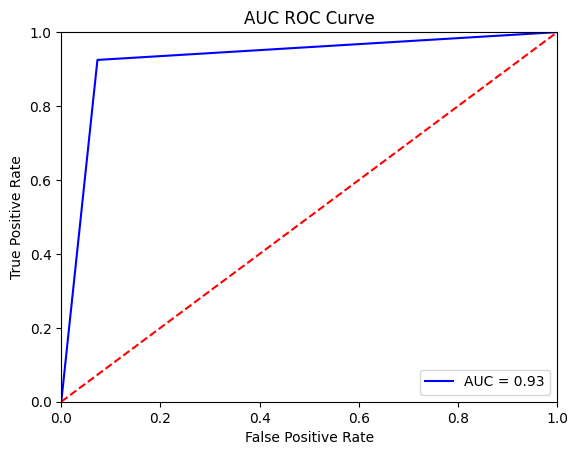

In [37]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
def plot_auc_roc(model,valid_loader, version='title', threshold=0.5):
    y_pred = []
    y_true = []
    model.eval()
    hidd = model.init_hidden(valid_loader.batch_size)
    with torch.no_grad():
      for inputs, labels in valid_loader :
            inputs = inputs.to(device)

            if len(inputs) != valid_loader.batch_size: break
            output,hidd  = model(inputs, hidd)

            output = (output > threshold).int()
            # output = torch.max(output, dim = 1)
            # print(output)
            y_pred.extend(output.tolist())
            y_true.extend(labels.tolist())
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    print('AUC ROC : %f ' % (roc_auc))
    print('----------------------------------------------------------')
    
    plt.title('AUC ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_auc_roc(model, test_loader) 